<a href="https://colab.research.google.com/github/ruchibhadauria/machine-learning/blob/master/SalesAnalysis/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis

## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [4]:
sales_jan = pd.read_csv('/content/Sales_January_2019.csv')
sales_feb = pd.read_csv('/content/Sales_February_2019.csv')
sales_mar = pd.read_csv('/content/Sales_March_2019.csv')
sales_apr = pd.read_csv('/content/Sales_April_2019.csv')
sales_may = pd.read_csv('/content/Sales_May_2019.csv')
sales_jun = pd.read_csv('/content/Sales_June_2019.csv')
sales_jul = pd.read_csv('/content/Sales_July_2019.csv')
sales_aug = pd.read_csv('/content/Sales_August_2019.csv')
sales_sep = pd.read_csv('/content/Sales_September_2019.csv')
sales_oct = pd.read_csv('/content/Sales_October_2019.csv')
sales_nov = pd.read_csv('/content/Sales_November_2019.csv')
sales_dec = pd.read_csv('/content/Sales_December_2019.csv')

### Merging all months of sales data into a single file

In [5]:
sales = pd.concat([sales_jan, sales_feb, sales_mar, sales_apr, sales_may, sales_jun, sales_jul, sales_aug, sales_sep,
                   sales_oct, sales_nov, sales_dec], ignore_index=True, axis=0)
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


#### Dropping all the null values

In [6]:
sales.dropna(how='all', inplace=True)

#### Creating a month column

In [7]:
sales['Month'] = sales['Order Date'].apply(lambda x: str(x).split('/')[0])

#### Deleting rows with Order Date as Month value

In [8]:
sales.drop(sales[sales['Month']=='Order Date'].index, inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


#### Changing datatype of columns

In [9]:
sales['Month'] = sales['Month'].astype('int32')
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int32')
sales['Price Each'] = sales['Price Each'].astype('float32')

#### Creating a sale column

In [10]:
sales['Sale'] = sales['Quantity Ordered'] * sales['Price Each']
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.950000,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.950000
186846,319667,AA Batteries (4-pack),2,3.840000,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.680000
186847,319668,Vareebadd Phone,1,400.000000,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.000000
186848,319669,Wired Headphones,1,11.990000,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.990000


#### What is the best month for sales? How much was earned that month?


In [11]:
grouped_by_month = pd.DataFrame(sales.groupby(by='Month').sum())
grouped_by_month

,Quantity Ordered,Price Each,Sale
Month,,,
1,10903,1811768.375,1822256.75
2,13449,2188884.750,2202022.50
3,17005,2791207.750,2807100.25
4,20558,3367671.000,3390670.25
5,18667,3135125.000,3152606.75
6,15253,2562025.500,2577802.25
7,16072,2632539.500,2647775.75
8,13448,2230345.500,2244467.75
9,13109,2084992.125,2097560.00


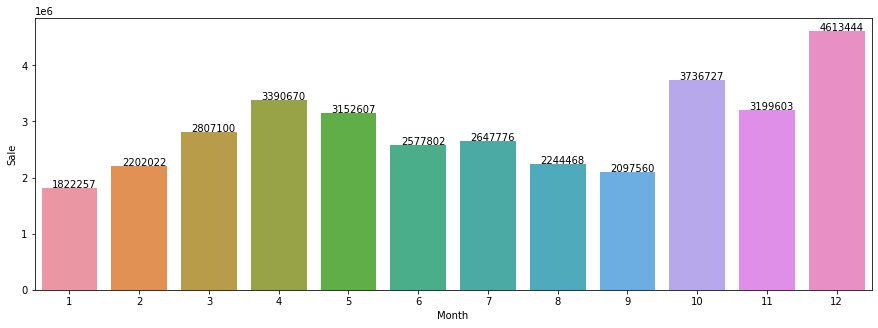

In [12]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=grouped_by_month.index, y=grouped_by_month['Sale'], data=grouped_by_month);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Month of december has highest sales of around 46 lacs.

#### What city had the highest number of sales?

In [13]:
def city_state(x):
    city = x.split(',')[1]
    state = x.split(',')[2].split(' ')[1]
    return city + '(' + state + ')'

sales['City'] = sales['Purchase Address'].apply(lambda x: city_state(x))
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.000000,Boston(MA)
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.950000,Portland(OR)
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.980000,San Francisco(CA)
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.990005,Los Angeles(CA)
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.990000,Austin(TX)


In [14]:
grouped_by_city = pd.DataFrame(sales.groupby(by='City').sum())
grouped_by_city

,Quantity Ordered,Price Each,Month,Sale
City,,,,
Atlanta(GA),16602,2779908.250,104794,2.795498e+06
Austin(TX),11153,1809873.625,69829,1.819582e+06
Boston(MA),22528,3637409.750,141112,3.661642e+06
Dallas(TX),16730,2752627.750,104620,2.767976e+06
Los Angeles(CA),33289,5421435.000,208325,5.452571e+06
New York City(NY),27932,4635371.000,175741,4.664318e+06
Portland(ME),2750,447189.250,17144,4.497583e+05
Portland(OR),11303,1860558.250,70621,1.870732e+06
San Francisco(CA),50239,8211461.500,315520,8.262204e+06


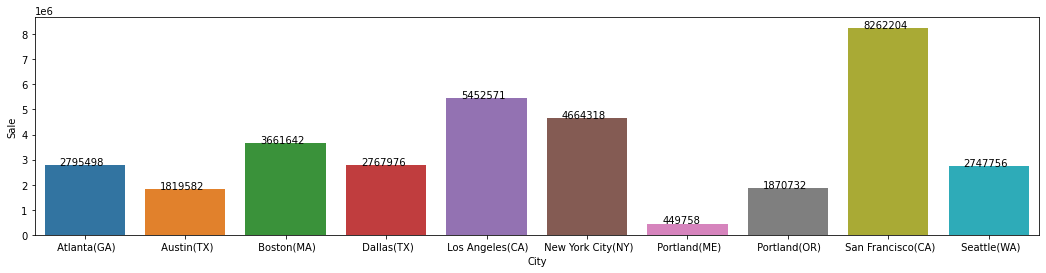

In [15]:
plt.figure(figsize=(18, 4))
a = sns.barplot(x=grouped_by_city.index, y=grouped_by_city['Sale'], data=grouped_by_city)
for p in a.patches:
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [16]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Hour'] = sales['Order Date'].apply(lambda x: x.hour)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.000000,Boston(MA),21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.950000,Portland(OR),14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.980000,San Francisco(CA),13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.990005,Los Angeles(CA),20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.990000,Austin(TX),11


In [17]:
grouped_by_hour = pd.DataFrame(sales.groupby(by='Hour').count())
grouped_by_hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


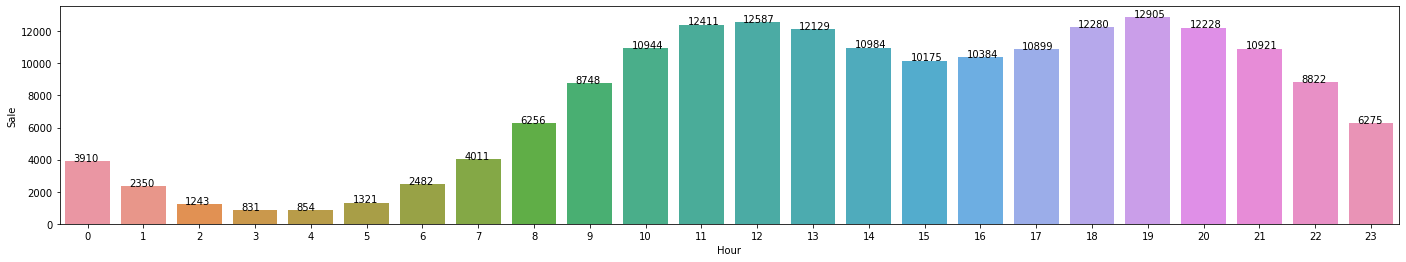

In [18]:
plt.figure(figsize=(24, 4))
a = sns.barplot(x=grouped_by_hour.index, y=grouped_by_hour['Sale'], data=grouped_by_hour)
for p in a.patches:
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

#### What products are most often sold together?

In [59]:
grouped_by_order_id = sales.groupby('Order ID')['Order ID', 'Product'].transform(lambda x: ','.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [60]:
grouped_by_order_id

,Order ID,Product
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones
...,...,...
186845,319666,Lightning Charging Cable
186846,319667,AA Batteries (4-pack)
186847,319668,Vareebadd Phone
186848,319669,Wired Headphones


In [62]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped_by_order_id['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(9):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327


#### What product sold the most? Why do you think it sold the most?

In [69]:
grouped_by_product = sales.groupby('Product').sum()
grouped_by_product

,Quantity Ordered,Price Each,Month,Sale,Hour
Product,,,,,
20in Monitor,4129,4.510690e+05,29336,4.541487e+05,58764
27in 4K Gaming Monitor,6244,2.429638e+06,44440,2.435098e+06,90916
27in FHD Monitor,7550,1.125975e+06,52558,1.132424e+06,107540
34in Ultrawide Monitor,6199,2.348718e+06,43304,2.355558e+06,89076
AA Batteries (4-pack),27635,7.901568e+04,145558,1.061184e+05,298342
AAA Batteries (4-pack),31017,6.171659e+04,146370,9.274083e+04,297332
Apple Airpods Headphones,15661,2.332350e+06,109477,2.349150e+06,223304
Bose SoundSport Headphones,13457,1.332367e+06,94113,1.345565e+06,192445
Flatscreen TV,4819,1.440000e+06,34224,1.445700e+06,68815


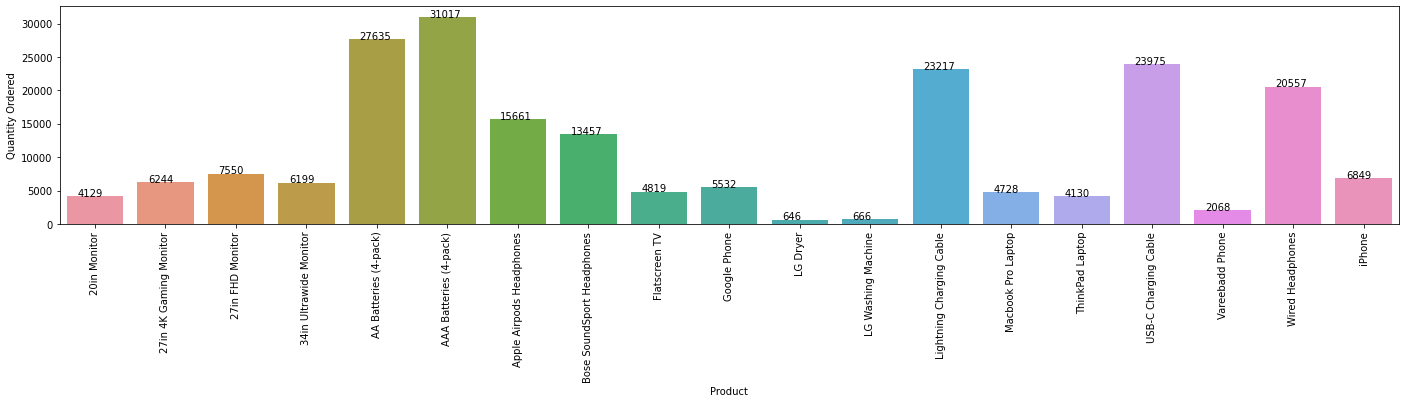

In [73]:
plt.figure(figsize=(24, 4))
a = sns.barplot(x=grouped_by_product.index, y=grouped_by_product['Quantity Ordered'], data=grouped_by_product)

for p in a.patches:
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.xticks(rotation=90)
plt.show()

In [74]:
price = sales.groupby('Product').mean()['Price Each']
print(price)

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32


<BarContainer object of 19 artists>

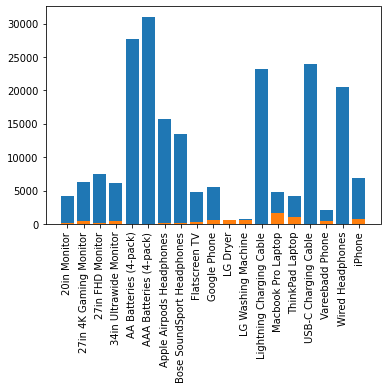

In [77]:
plt.bar(grouped_by_product.index, grouped_by_product['Quantity Ordered'])
plt.xticks(rotation = 90)
plt.bar(price.index, price)                                  

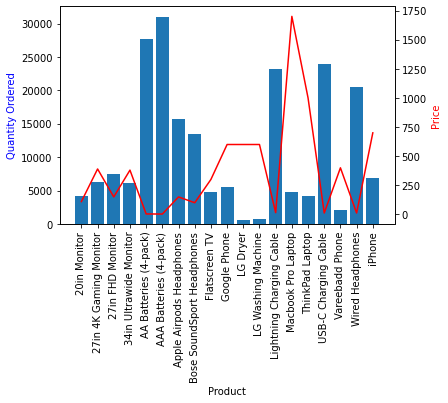

In [94]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.bar(grouped_by_product.index, grouped_by_product['Quantity Ordered'])
ax2.plot(price.index, price, color='r')

ax.set_ylabel('Quantity Ordered', color='b')
ax.set_xlabel('Product')
ax2.set_ylabel('Price', color='r')
ax.set_xticklabels(labels=price.index, rotation=90)

plt.show()